In [21]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt
import plotly.express as px
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
pd.options.plotting.backend = 'plotly'

In [203]:
air_quality_data = pd.read_csv("Air_Quality.csv")

In [137]:
air_quality_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN


In [138]:
air_quality_data["Start_Date"].head()

0    01/01/2015
1    06/01/2014
2    06/01/2014
3    06/01/2014
4    06/01/2014
Name: Start_Date, dtype: object

In [139]:
air_quality_data["Start_Date"] = pd.to_datetime(air_quality_data['Start_Date'] , format='%m/%d/%Y')

In [206]:
air_quality_data["Name"].unique()
# 'Asthma emergency department visits due to PM2.5'
# 'Boiler Emissions- Total PM2.5 Emissions'
# 'Deaths due to PM2.5
# 'Asthma emergency department visits due to PM2.5'

array(['Boiler Emissions- Total SO2 Emissions', 'Ozone (O3)',
       'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Asthma hospitalizations due to Ozone',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Asthma emergency departments visits due to Ozone',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Cardiac and respiratory deaths due to Ozone',
       'Deaths due to PM2.5', 'Outdoor Air Toxics - Benzene',
       'Annual vehicle miles traveled (trucks)',
       'Annual vehicle miles traveled (cars)'], dtype=object)

In [209]:
air_quality_data[air_quality_data["Name"] == 'Respiratory hospitalizations due to PM2.5 (age 20+)']["Geo Place Name"].shape

(240,)

In [22]:
fig = px.histogram(air_quality_data, x="Name").update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
# fig = px.scatter(air_quality_data, x = 'Start_Date', y = ['Data Value', '', color = 'Geo Place Name',
#                  labels={
#                      'Start_Date': "Date",
#                      'Data Value': "Fine particles (PM 2.5) in mcg/m3"
#                  }, title = "Average Fine particles (PM 2.5) Measure Across New York")
# fig.show()

In [295]:
air_quality_data.shape

(18025, 12)

In [302]:
print(air_quality_data.head().to_markdown())

|    |   Unique ID |   Indicator ID | Name                                  | Measure        | Measure Info   | Geo Type Name   |   Geo Join ID | Geo Place Name           | Time Period   | Start_Date   |   Data Value |   Message |
|---:|------------:|---------------:|:--------------------------------------|:---------------|:---------------|:----------------|--------------:|:-------------------------|:--------------|:-------------|-------------:|----------:|
|  0 |      179772 |            640 | Boiler Emissions- Total SO2 Emissions | Number per km2 | number         | UHF42           |           409 | Southeast Queens         | 2015          | 01/01/2015   |          0.3 |       nan |
|  1 |      221956 |            386 | Ozone (O3)                            | Mean           | ppb            | UHF34           |        305307 | Upper East Side-Gramercy | Summer 2014   | 06/01/2014   |         24.9 |       nan |
|  2 |      221806 |            386 | Ozone (O3)                            

In [ ]:
# air_quality_data[air_quality_data["Name"].isin(['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)'])]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,2014-06-01,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,2014-06-01,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,2014-06-01,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,2014-06-01,31.9,NaN
6,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17980,825908,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Annual Average 2022,2022-01-01,16.9,NaN
17981,602875,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Winter 2017-18,2017-12-01,25.6,NaN
17982,171581,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,2008-12-01,29.9,NaN
17983,602890,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,402.0,West Queens,Winter 2017-18,2017-12-01,26.8,NaN


In [144]:
air_quality_data = air_quality_data[air_quality_data["Name"].isin(['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)'])].reset_index(drop=True)
air_quality_data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,2014-06-01,24.9,NaN
1,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,2014-06-01,30.7,NaN
2,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,2014-06-01,32.0,NaN
3,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,2014-06-01,31.9,NaN
4,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13954,825908,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Annual Average 2022,2022-01-01,16.9,NaN
13955,602875,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Winter 2017-18,2017-12-01,25.6,NaN
13956,171581,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,2008-12-01,29.9,NaN
13957,602890,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,402.0,West Queens,Winter 2017-18,2017-12-01,26.8,NaN


In [297]:
air_quality_data["Geo Place Name"].nunique()

114

In [145]:
fig = px.histogram(air_quality_data, x="Geo Place Name").update_xaxes(categoryorder='total descending')
fig.show()

In [146]:
air_quality_data["Name"].unique()

array(['Ozone (O3)', 'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)'],
      dtype=object)

In [147]:
# only_fine_p = air_quality_data.copy()
only_fine_p = air_quality_data[air_quality_data["Name"] == 'Fine particles (PM 2.5)'].copy()
# display(only_fine_p[only_fine_p["Geo Place Name"] == 'Upper East Side-Gramercy'])
display(only_fine_p[only_fine_p["Geo Join ID"] == 307.0])

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
72,547441,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Annual Average 2017,2017-01-01,10.3,NaN
73,742236,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Annual Average 2021,2021-01-01,8.2,NaN
75,605735,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Annual Average 2018,2018-01-01,10.3,NaN
96,212818,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Summer 2014,2014-06-01,12.4,NaN
149,170430,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307.0,Sunset Park (CD7),Annual Average 2013,2012-12-01,9.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11078,410808,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Summer 2016,2016-06-01,11.2,NaN
11239,411056,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307.0,Sunset Park (CD7),Winter 2015-16,2015-12-01,9.5,NaN
12890,177163,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Winter 2008-09,2008-12-01,17.6,NaN
12891,823252,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,307.0,Gramercy Park - Murray Hill,Annual Average 2022,2022-01-01,7.9,NaN


In [303]:
fig = px.scatter(only_fine_p, x = 'Start_Date', y = 'Data Value', color = 'Geo Place Name',
                 labels={
                     'Start_Date': "Date",
                     'Data Value': "Fine particles (PM 2.5) in mcg/m3"
                 }, title = "Average Fine particles (PM 2.5) Measure Across New York")
fig.show()
fig.write_html('all_fm_per_state.html', include_plotlyjs='cdn')

In [149]:
only_nitr = air_quality_data[air_quality_data["Name"] == 'Nitrogen dioxide (NO2)'].copy()
only_nitr.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
27,176692,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2013,2012-12-01,18.6,NaN
28,549806,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2017,2017-01-01,17.7,NaN
29,175369,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,409.0,Southeast Queens,Winter 2010-11,2010-12-01,25.7,NaN
30,175915,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,409.0,Southeast Queens,Summer 2009,2009-06-01,16.1,NaN
31,549872,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,410.0,Rockaways,Annual Average 2017,2017-01-01,12.7,NaN


In [207]:
fig = px.scatter(only_nitr, x = 'Start_Date', y = 'Data Value', color = 'Geo Place Name',
                 labels={
                     'Start_Date': "Date",
                     'Data Value': "Nitrogen dioxide in ppb"
                 }, title = "Average Nitrogen dioxide Across New York")
fig.show()

In [179]:
val_c = air_quality_data["Start_Date"].value_counts().reset_index()
print(val_c.head())
fig = px.histogram(air_quality_data[air_quality_data["Name"] == "Nitrogen dioxide (NO2)"], x="Start_Date")
fig.show()

  Start_Date  count
0 2008-12-01    564
1 2010-12-01    564
2 2013-12-01    564
3 2012-12-01    564
4 2009-06-01    564


In [196]:
agg_ny_air = air_quality_data.groupby(['Start_Date', 'Name'])[['Data Value']].mean().reset_index()
agg_ny_air['Start_Date'].value_counts().head()

Start_Date
2022-06-01    3
2013-06-01    3
2017-06-01    3
2009-06-01    3
2016-06-01    3
Name: count, dtype: int64

In [197]:
start_dt = dt.datetime(2014, 1, 1)
end_dt =dt.datetime(2023, 1, 1)
agg_ny_air = agg_ny_air[(agg_ny_air['Start_Date'] > start_dt) & (air_quality_data['Start_Date'] < end_dt)]
# agg_ny_air.drop('index', axis=1, inplace=True)
agg_ny_air.head()

/var/folders/nb/r2qqfyw914j_b13qw705yqhc0000gn/T/ipykernel_42169/752500888.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Start_Date,Name,Data Value
27,2014-06-01,Fine particles (PM 2.5),8.996454
28,2014-06-01,Nitrogen dioxide (NO2),16.231206
29,2014-06-01,Ozone (O3),30.453901
30,2014-12-01,Fine particles (PM 2.5),9.638298
31,2014-12-01,Nitrogen dioxide (NO2),25.270922


In [194]:
agg_ny_air_nitr = agg_ny_air[agg_ny_air["Name"] == 'Nitrogen dioxide (NO2)'].copy()

In [198]:
fig = px.scatter(agg_ny_air_nitr, x = 'Start_Date', y = 'Data Value',
                 labels={
                     'Start_Date': "Date",
                     'Data Value': "Fine particles (PM 2.5) in mcg/m3"
                 }, title = "Average Fine particles (PM 2.5) Measure Across New York")
fig.show()

In [199]:
plain_dt =dt.datetime(2014, 1, 1)
plain_dt2 =dt.datetime(2013, 1, 10)
air_quality_data[(air_quality_data['Start_Date'] > plain_dt) & (air_quality_data['Start_Date'] < plain_dt2)].shape

(0, 12)

In [200]:
agg_ny_air_pm = agg_ny_air[agg_ny_air["Name"] == 'Fine particles (PM 2.5)'].copy()

In [201]:
fig = px.scatter(agg_ny_air_pm, x = 'Start_Date', y = 'Data Value',
                 labels={
                     'Start_Date': "Date",
                     'Data Value': "Fine particles (PM 2.5) in mcg/m3"
                 }, title = "Average Fine particles (PM 2.5) Measure Across New York")
fig.show()

In [ ]:
!pip install geopandas folium

In [65]:
air_quality_data['Geo Place Name'].unique()

array(['Southeast Queens', 'Upper East Side-Gramercy',
       'Fordham - Bronx Pk', 'East New York', 'Pelham - Throgs Neck',
       'Bensonhurst - Bay Ridge', 'Chelsea-Village',
       'Flushing - Clearview', 'Rockaways',
       'Coney Island - Sheepshead Bay', 'Williamsburg - Bushwick',
       'Bayside - Little Neck', 'Upper West Side', 'Canarsie - Flatlands',
       'Jamaica', 'Gramercy Park - Murray Hill',
       'Hunts Point - Mott Haven', 'Southwest Queens',
       'Greenwich Village - SoHo', 'Brooklyn',
       'Downtown - Heights - Slope', 'Washington Heights',
       'Northeast Bronx', 'Greenpoint', 'Long Island City - Astoria',
       'Port Richmond', 'Kingsbridge - Riverdale',
       'Throgs Neck and Co-op City (CD10)',
       'Williamsbridge and Baychester (CD12)',
       'Jamaica and Hollis (CD12)',
       'South Ozone Park and Howard Beach (CD10)',
       'Kingsbridge Heights and Bedford (CD7)', 'Sunset Park (CD7)',
       'Rockaway and Broad Channel (CD14)', 'Upper West Si

In [ ]:
air_quality_data[""]

In [80]:
import folium
import geopandas as gpd

# Load NYC neighborhood shapefile
gdf = gpd.read_file("neighborhoods-in-new-york/ZillowNeighborhoods-NY.shp")  # Replace with your actual file

print(gdf.columns)
# List of neighborhoods to highlight
highlighted_neighborhoods = air_quality_data['Geo Place Name'].unique()

# Function to style neighborhoods
def style_function(feature):
    neighborhood_name = feature["properties"]["County"]
    print(neighborhood_name)
    if neighborhood_name in highlighted_neighborhoods:
        return {"fillColor": "red", "color": "black", "weight": 2, "fillOpacity": 0.6}
    return {"fillColor": "white", "color": "black", "weight": 1, "fillOpacity": 0.3}

# Create a Folium map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add neighborhoods with conditional styling
folium.GeoJson(
    gdf,
    name="Neighborhoods",
    style_function=style_function
).add_to(nyc_map)

# Save and display
nyc_map.save("nyc_neighborhoods_map.html")
print("Map saved as nyc_neighborhoods_map.html")

Index(['State', 'County', 'City', 'Name', 'RegionID', 'geometry'], dtype='object')
Suffolk
Suffolk
Albany
Queens
Suffolk
Albany
Queens
Westchester
Rockland
Suffolk
Suffolk
New York
Nassau
Rockland
Queens
Rockland
Suffolk
Queens
Suffolk
Suffolk
Cattaraugus
Rensselaer
Queens
Suffolk
Queens
Westchester
Bronx
Suffolk
Queens
Suffolk
Suffolk
Rockland
Wyoming
Rockland
Queens
Queens
Rockland
Kings
Suffolk
Westchester
Rockland
Westchester
Richmond
Rockland
Queens
Rockland
Westchester
Rockland
Queens
Suffolk
Queens
Nassau
Rockland
Queens
Rockland
New York
Albany
Queens
Albany
Nassau
Queens
Westchester
Suffolk
Westchester
Rockland
Westchester
Rockland
Queens
Erie
Suffolk
Nassau
Nassau
Rockland
Rockland
Nassau
Queens
Queens
Putnam
Queens
Westchester
Suffolk
Queens
Queens
Nassau
Albany
Suffolk
Queens
Suffolk
Queens
Suffolk
Westchester
Nassau
Rockland
Westchester
Suffolk
Suffolk
Queens
Westchester
Suffolk
Rensselaer
Rockland
Queens
Erie
Queens
Queens
Westchester
Rockland
Erie
Suffolk
Monroe
Nassau
W

In [84]:
air_quality_data['Geo Place Name'].nunique()

114

In [ ]:
air_quality_data['Geo Join ID'].value_counts()

In [ ]:
air_quality_data["Geo Place Name"].unique()

In [246]:
X = agg_ny_air_pm[['Start_Date']]
X['Start_Date'] = X['Start_Date'].map(dt.datetime.toordinal)
y = agg_ny_air_pm['Data Value']

start_dt = dt.datetime(2015, 1, 1)
all_start_dt = dt.datetime.toordinal(start_dt)

t_start_dt = dt.datetime(2020, 1, 1)
test_start_dt = dt.datetime.toordinal(t_start_dt)

# y = y[X['Start_Date'] > all_start_dt]
# X = X[X['Start_Date'] > all_start_dt]
print(X.head())
X_train = X[X['Start_Date'] < test_start_dt]
X_test = X[X['Start_Date'] >= test_start_dt]
print(X.head())
y_train = y[X['Start_Date'] < test_start_dt]
y_test = y[X['Start_Date'] >= test_start_dt]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X.shape)
print("X train shape ", X_train.shape)
print("X test shape ", X_test.shape)
print("y train shape ", y_train.shape)
print("y test shape ", y_test.shape)

    Start_Date
27      735385
30      735568
32      735599
34      735750
37      735933
    Start_Date
27      735385
30      735568
32      735599
34      735750
37      735933
(25, 1)
X train shape  (17, 1)
X test shape  (8, 1)
y train shape  (17,)
y test shape  (8,)


/var/folders/nb/r2qqfyw914j_b13qw705yqhc0000gn/T/ipykernel_42169/2283867679.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# print(cross_val_score(linear_model, X_train, y_train, cv = 10))

all_linear_pred = linear_model.predict(X)

In [261]:
hyperparams = {
    'polynomialfeatures__degree': range(1, 6)
}

final_model = GridSearchCV(
        make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression()),
        param_grid=hyperparams,
        scoring='neg_mean_squared_error'
)

In [262]:
final_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 6)},
             scoring='neg_mean_squared_error')

In [265]:
final_model.best_params_

{'polynomialfeatures__degree': 1}

In [270]:
poly_regres_pred = final_model.predict(X)
poly_regres_df = {'Poly Regression Predictions' : poly_regres_pred, 'Actual Values': y, 'Date' : agg_ny_air_pm['Start_Date']}

In [271]:
fig = px.line(poly_regres_df, x='Date', y=['Actual Values', 'Poly Regression Predictions' ], 
                 labels = {
                     'value': 'PM Values'
                 }, color_discrete_sequence= [ '#A4D394', '#C863EC'], title = 'Linear Regression Predictions')
# fig.update_traces({'name': 'hello'}, selector={'name': poly_pred})
# fig.update_traces({'name': 'Actual'}, selector={'name': y_train})
fig.show()
fig.write_html('base_model_test_p3a.html', include_plotlyjs='cdn')

In [255]:
data = {'Linear Predictions': all_linear_pred, 'Actual Values' : y, 'Date' : agg_ny_air_pm['Start_Date']}

In [256]:
prediction_df = pd.DataFrame(data)

In [259]:
fig = px.line(prediction_df, x='Date', y=['Actual Values', 'Linear Predictions' ], 
                 labels = {
                     'value': 'PM Values'
                 }, color_discrete_sequence= [ '#A4D394', '#C863EC'], title = 'Linear Regression Predictions')
# fig.update_traces({'name': 'hello'}, selector={'name': poly_pred})
# fig.update_traces({'name': 'Actual'}, selector={'name': y_train})
fig.show()
fig.write_html('base_model_test_p3a.html', include_plotlyjs='cdn')

In [236]:
linear_df2 = {'Linear Predictions' : linear_pred, 'Actual Values': y_test, 'Date' : agg_ny_air_pm[agg_ny_air_pm['Start_Date'] >= t_start_dt]['Start_Date']}

In [238]:
fig = px.line(linear_df, x='Date', y=['Actual Values', 'Linear Predictions' ], 
                 labels = {
                     'value': 'Number of EVs'
                 }, color_discrete_sequence= [ '#A4D394', '#C863EC'], title = 'Linear Regression Predictions for Lasr Year of Data')
# fig.update_traces({'name': 'hello'}, selector={'name': poly_pred})
# fig.update_traces({'name': 'Actual'}, selector={'name': y_train})
fig.show()
fig.write_html('base_model_test_p3a.html', include_plotlyjs='cdn')

In [299]:
pivot_df = agg_ny_air.pivot(index='Start_Date', columns='Name', values='Data Value')
pivot_df = pivot_df.reset_index()
pivot_df

Name,Start_Date,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
0,2014-06-01,8.996454,16.231206,30.453901
1,2014-12-01,9.638298,25.270922,NaN
2,2015-01-01,9.043972,20.360284,NaN
3,2015-06-01,9.769504,15.741844,30.915603
4,2015-12-01,8.457447,23.729078,NaN
5,2015-12-31,7.894326,19.476596,NaN
6,2016-06-01,8.468085,15.194326,32.982979
7,2016-12-01,8.201418,25.882979,NaN
8,2017-01-01,7.741135,19.691489,NaN
9,2017-06-01,9.387943,15.405674,28.793617


In [305]:
fig = px.scatter(pivot_df, x = 'Start_Date', y = ['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', "Ozone (O3)"],
                 labels={
                     'Start_Date': "Date",
                     'Data Value': "Fine particles (PM 2.5) in mcg/m3"
                 }, title = "Average Fine particles (PM 2.5) Measure Across New York")
fig.show()
fig.write_html("pm_a2_o2.html")

In [279]:
correlation_matrix = pivot_df.corr()

# Print the correlation matrix
print(correlation_matrix)

Name                     Start_Date  Fine particles (PM 2.5)  \
Name                                                           
Start_Date                 1.000000                -0.760431   
Fine particles (PM 2.5)   -0.760431                 1.000000   
Nitrogen dioxide (NO2)    -0.319466                 0.139342   
Ozone (O3)                 0.048888                -0.403929   

Name                     Nitrogen dioxide (NO2)  Ozone (O3)  
Name                                                         
Start_Date                            -0.319466    0.048888  
Fine particles (PM 2.5)                0.139342   -0.403929  
Nitrogen dioxide (NO2)                 1.000000   -0.141417  
Ozone (O3)                            -0.141417    1.000000  


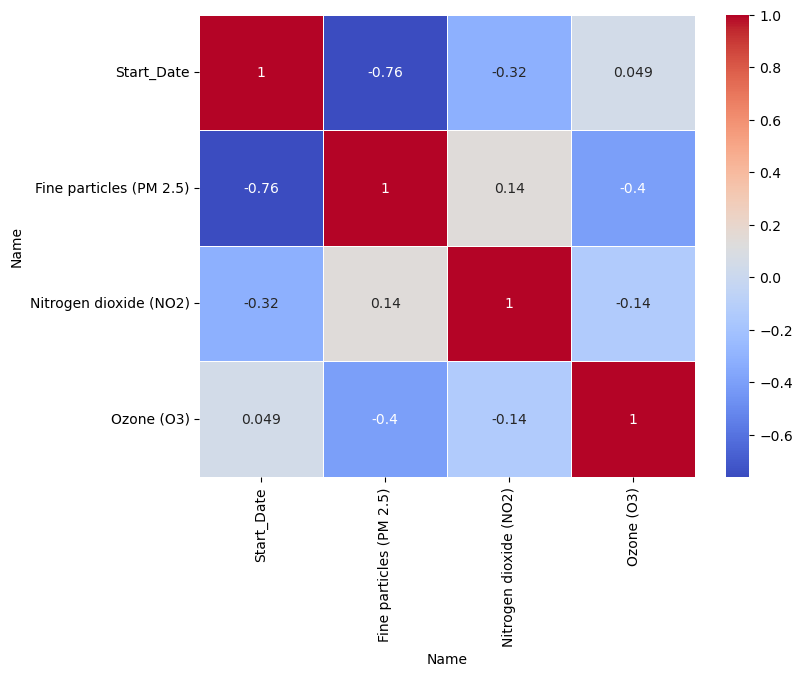

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.savefig("confusion_mat.png")
plt.show()